In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from zipfile import ZipFile
import csv


In [29]:
#df= pd.read_csv('AirQuality_SpreadSheets\HourlyData_ByYear\Hourly_2020\CO_2020.csv', skiprows=7)
#df

file_holder = open('AirQuality_SpreadSheets\HourlyData_ByYear\Hourly_1989\CO_1989.csv') #Read file as IO text wrapper
csv_reader = csv.reader(file_holder) 
header = [] #Empty array to hold column names later
header = next(csv_reader) # Load the first row


In [39]:

header = next(csv_reader) 
header

['CO',
 '010102',
 'St Johns',
 'NL',
 '47.56038',
 '-52.7115',
 '19890105',
 '0.60',
 '1.10',
 '0.80',
 '0.10',
 '0.10',
 '0.20',
 '0.40',
 '0.50',
 '0.30',
 '0.20',
 '0.20',
 '0.10',
 '0.20',
 '0.20',
 '0.20',
 '0.20',
 '0.40',
 '0.50',
 '0.40',
 '0.40',
 '0.40',
 '0.50',
 '0.40',
 '0.40']

In [45]:
modern_header_variant1 = ['Pollutant // Polluant', 'NAPS ID // Identifiant SNPA', 'City // Ville', 'P/T // P/T',
                        'Latitude // Latitude', 'Longitude // Longitude', 'Date // Date',
                        'H01 // H01', 'H02 // H02', 'H03 // H03', 'H04 // H04', 'H05 // H05', 'H06 // H06', 'H07 // H07', 'H08 // H08',
                        'H09 // H09', 'H10 // H10', 'H11 // H11', 'H12 // H12', 'H13 // H13', 'H14 // H14', 'H15 // H15', 'H16 // H16',
                        'H17 // H17', 'H18 // H18', 'H19 // H19', 'H20 // H20', 'H21 // H21', 'H22 // H22', 'H23 // H23', 'H24 // H24']

modern_header_variant2 = ['Pollutant//Polluant', 'NAPS ID//Identifiant SNPA', 'City//Ville', 'Province/Territory//Province/Territoire',
                        'Latitude//Latitude', 'Longitude//Longitude', 'Date//Date',
                        'H01//H01', 'H02//H02', 'H03//H03', 'H04//H04', 'H05//H05', 'H06//H06', 'H07//H07', 'H08//H08', 'H09//H09', 'H10//H10', 'H11//H11',
                        'H12//H12', 'H13//H13', 'H14//H14', 'H15//H15', 'H16//H16', 'H17//H17', 'H18//H18', 'H19//H19', 'H20//H20', 'H21//H21', 'H22//H22',
                        'H23//H23', 'H24//H24']

old_school_header = ['Pollutant', 'NAPSID', 'City', 'P/T', 'Latitude', 'Longitude', 'Date',
                    'H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13',
                    'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24']

pm25_old_header = ['Pollutant', 'Method', 'NAPSID', 'City', 'P/T', 'Latitude', 'Longitude', 'Date', 'H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24'
                    ]

pm25_new_header = ['Pollutant//Polluant', 'Method Code//Code Méthode', 'NAPS ID//Identifiant SNPA', 'City//Ville',
                   'Province/Territory//Province/Territoire', 'Latitude//Latitude', 'Longitude//Longitude', 'Date//Date',
                   'H01//H01', 'H02//H02', 'H03//H03', 'H04//H04', 'H05//H05', 'H06//H06', 'H07//H07', 'H08//H08',
                   'H09//H09', 'H10//H10', 'H11//H11', 'H12//H12', 'H13//H13', 'H14//H14', 'H15//H15', 'H16//H16',
                   'H17//H17', 'H18//H18', 'H19//H19', 'H20//H20', 'H21//H21', 'H22//H22', 'H23//H23', 'H24//H24'
                    ]


pm25_other_header = ['Pollutant//Polluant', 'Method Code//Code MÃ©thode', 'NAPS ID//Identifiant SNPA', 'City//Ville',
                   'Province/Territory//Province/Territoire', 'Latitude//Latitude', 'Longitude//Longitude', 'Date//Date',
                   'H01//H01', 'H02//H02', 'H03//H03', 'H04//H04', 'H05//H05', 'H06//H06', 'H07//H07', 'H08//H08',
                   'H09//H09', 'H10//H10', 'H11//H11', 'H12//H12', 'H13//H13', 'H14//H14', 'H15//H15', 'H16//H16',
                   'H17//H17', 'H18//H18', 'H19//H19', 'H20//H20', 'H21//H21', 'H22//H22', 'H23//H23', 'H24//H24'
                    ]



pm25_new_header2 = ['Pollutant//Polluant', 'Method Code//Code M�thode', 'NAPS ID//Identifiant SNPA', 'City//Ville',
                   'Province/Territory//Province/Territoire', 'Latitude//Latitude', 'Longitude//Longitude', 'Date//Date',
                   'H01//H01', 'H02//H02', 'H03//H03', 'H04//H04', 'H05//H05', 'H06//H06', 'H07//H07', 'H08//H08',
                   'H09//H09', 'H10//H10', 'H11//H11', 'H12//H12', 'H13//H13', 'H14//H14', 'H15//H15', 'H16//H16',
                   'H17//H17', 'H18//H18', 'H19//H19', 'H20//H20', 'H21//H21', 'H22//H22', 'H23//H23', 'H24//H24'
                    ]




chemical_names_header = ['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'SO2']

year_list = []
for i in range(1979,2022):
    year_list.append(str(i))


for i in range(len(pm25_old_header)):
            pm25_old_header[i] = pm25_old_header[i].replace(" ", "")
            
for i in range(len(pm25_new_header)):
            pm25_new_header[i] = pm25_new_header[i].replace(" ", "")

for i in range(len(pm25_other_header)):
            pm25_other_header[i] = pm25_other_header[i].replace(" ", "")


for i in range(len(pm25_new_header2)):
            pm25_new_header2[i] = pm25_new_header2[i].replace(" ", "")


for i in range(len(modern_header_variant1)):
            modern_header_variant1[i] = modern_header_variant1[i].replace(" ", "")
            
for i in range(len(modern_header_variant2)):
            modern_header_variant2[i] = modern_header_variant2[i].replace(" ", "")

name_mapping = {
    'CO': 'Carbon monoxide',
    'NO2': 'Nitrogen dioxide',
    'NO': 'Nitric oxide',
    'NOX': 'Nitrogen oxides',
    'O3': 'Ozone',
    'SO2': 'Sulphur dioxide'
}

In [46]:

# for particulate_name in chemical_names_header:
total_dataframe = pd.DataFrame(columns=['Pollutant','NAPSID','City','P/T','Latitude','Longitude','Date',
                            'H01','H02','H03','H04','H05','H06','H07','H08','H09','H10','H11','H12','H13',
                            'H14','H15','H16','H17','H18','H19','H20','H21','H22','H23','H24'])
total_pm25_dataframe = pd.DataFrame(columns=['Pollutant', 'Method', 'NAPSID', 'City', 'P/T', 'Latitude', 'Longitude', 'Date',
                    'H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 
                    'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24'
                    ])
for year_holder in year_list:
    try:
        path_string = 'AirQuality_SpreadSheets\HourlyData_ByYear\Hourly_' + year_holder + '\\' + 'PM25' +'_' + year_holder + '.csv'
        file_holder = open(path_string) #Read file as IO text wrapper
        csv_reader = csv.reader(file_holder) 
        header = [] #Empty array to hold column names later
        header = next(csv_reader) # Load the first row
        for i in range(len(header)):
                header[i] = header[i].replace(" ", "")
        data_start_index = 0 #Variable to store the row line where pandas should start reading data
        
        #Find the column names
        while(header != modern_header_variant1) and (header != modern_header_variant2) and (header != old_school_header) and (header != pm25_new_header) and (header != pm25_new_header2) and (header != pm25_old_header) and (header != pm25_other_header):
            # if(year_holder=='2019') and (data_start_index < 20):
            #     print(header)  
            data_start_index += 1
            header = next(csv_reader)
            for i in range(len(header)):
                header[i] = header[i].replace(" ", "")
        print(year_holder)    
        file_holder.close()
        #print(header)
        
        df_holder = pd.read_csv(path_string,encoding='ISO-8859-1',skiprows=data_start_index)
        
        # try:
        #     df_holder.columns = total_dataframe.columns
        # except:
        df_holder.columns = total_pm25_dataframe.columns
        # print(df_holder.head())
        df_holder['Unit'] ='µg/m3'
        total_dataframe = pd.concat([total_dataframe, df_holder])
        
    except:
        # print('Could not find a file in the specified path')
        hg = 1

#df= pd.read_csv('AirQuality_SpreadSheets\HourlyData_ByYear\Hourly_1989\CO_1989.csv',encoding='ISO-8859-1', skiprows=5)

    # Need to impute values
clipped_frame = total_dataframe.iloc[:,7:]
print(clipped_frame.shape[0])
print(clipped_frame.shape[1])
num_rows = clipped_frame.shape[0]
num_columns = clipped_frame.shape[1]
total_dataframe = total_dataframe.replace(-999.0,np.nan)

start_column = total_dataframe.columns.get_loc('H01')
end_column = total_dataframe.columns.get_loc('H24')
# for i in range(num_rows):
for j in range(start_column,end_column+1):
    total_dataframe.iloc[:,j] = total_dataframe.iloc[:,j].apply(pd.to_numeric)
    total_dataframe.iloc[:,j] = total_dataframe.iloc[:,j].replace(np.nan,total_dataframe.iloc[:,j].mean())
# if(pd.isnull(total_dataframe.iloc[i,j])):
    # total_dataframe.iloc[i,j] = total_dataframe.iloc[:,j].mean()
total_dataframe.to_csv( 'PM25' + '_Total_Data.csv', encoding='utf-8', index=False)

total_dataframe
#total_dataframe
#total_dataframe.to_csv('CO_Total_Data.csv', encoding='utf-8', index=False)


1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
1595441
26


,Pollutant,NAPSID,City,P/T,Latitude,Longitude,Date,H01,H02,H03,...,H17,H18,H19,H20,H21,H22,H23,H24,Method,Unit
0,PM2.5,101101,Chilliwack,BC,49.155848,-121.940279,19950101,6.80987,6.570604,6.354044,...,6.168045,6.514917,6.885352,7.187527,7.379954,7.373244,7.229338,7.011988,706.0,µg/m3
1,PM2.5,101101,Chilliwack,BC,49.155848,-121.940279,19950102,6.80987,6.570604,6.354044,...,6.168045,6.514917,6.885352,7.187527,7.379954,7.373244,7.229338,7.011988,706.0,µg/m3
2,PM2.5,101101,Chilliwack,BC,49.155848,-121.940279,19950103,6.80987,6.570604,6.354044,...,6.168045,6.514917,6.885352,7.187527,7.379954,7.373244,7.229338,7.011988,706.0,µg/m3
3,PM2.5,101101,Chilliwack,BC,49.155848,-121.940279,19950104,6.80987,6.570604,6.354044,...,6.168045,6.514917,6.885352,7.187527,7.379954,7.373244,7.229338,7.011988,706.0,µg/m3
4,PM2.5,101101,Chilliwack,BC,49.155848,-121.940279,19950105,6.80987,6.570604,6.354044,...,6.168045,6.514917,6.885352,7.187527,7.379954,7.373244,7.229338,7.011988,706.0,µg/m3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83580,PM2.5,129601,Fort Smith,NT,60.004550,-111.893240,12/27/2021,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,236.0,µg/m3
83581,PM2.5,129601,Fort Smith,NT,60.004550,-111.893240,12/28/2021,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,236.0,µg/m3
83582,PM2.5,129601,Fort Smith,NT,60.004550,-111.893240,12/29/2021,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,236.0,µg/m3
83583,PM2.5,129601,Fort Smith,NT,60.004550,-111.893240,12/30/2021,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,236.0,µg/m3


In [47]:

for particulate_name in chemical_names_header:
    total_dataframe = pd.DataFrame(columns=['Pollutant','NAPSID','City','P/T','Latitude','Longitude','Date',
                                'H01','H02','H03','H04','H05','H06','H07','H08','H09','H10','H11','H12','H13',
                                'H14','H15','H16','H17','H18','H19','H20','H21','H22','H23','H24'])
    for year_holder in year_list:
        try:
            path_string = 'AirQuality_SpreadSheets\HourlyData_ByYear\Hourly_' + year_holder + '\\' + particulate_name +'_' + year_holder + '.csv'
            file_holder = open(path_string) #Read file as IO text wrapper
            csv_reader = csv.reader(file_holder) 
            header = [] #Empty array to hold column names later
            header = next(csv_reader) # Load the first row
            data_start_index = 0 #Variable to store the row line where pandas should start reading data
            #Find the column names
            while(header != modern_header_variant1) and (header != modern_header_variant2) and (header != old_school_header) and (header != pm25_new_header) and (header != pm25_new_header2) and (header != pm25_old_header):
                data_start_index += 1
                header = next(csv_reader)
                for i in range(len(header)):
                    header[i] = header[i].replace(" ", "")
            file_holder.close()
            #print(header)
            df_holder = pd.read_csv(path_string,encoding='ISO-8859-1',skiprows=data_start_index)
            df_holder.columns = total_dataframe.columns

            # df['Surrogate Keys'] = range(1,len(df)+1)
            # df = df.reindex(columns=['Surrogate Keys'] + list([c for c in df.columns if c!= 'Surrogate Keys']))
            if particulate_name == 'PM10':
                df_holder['Unit'] ='µg/m3'
                
            elif particulate_name  == 'CO':
                df_holder['Unit'] ='ppm'
            else:
                df_holder['Unit'] ='ppb'
            # print(df_holder.head())
            df_holder['Pollutant'] = df_holder['Pollutant'].replace(name_mapping)

            total_dataframe = pd.concat([total_dataframe, df_holder])
        except:
            print('Could not find a file in the specified path')

    #df= pd.read_csv('AirQuality_SpreadSheets\HourlyData_ByYear\Hourly_1989\CO_1989.csv',encoding='ISO-8859-1', skiprows=5)

        # Need to impute values
    clipped_frame = total_dataframe.iloc[:,7:]
    print(clipped_frame.shape[0])
    print(clipped_frame.shape[1])
    num_rows = clipped_frame.shape[0]
    num_columns = clipped_frame.shape[1]
    total_dataframe = total_dataframe.replace(-999.0,np.nan)

    start_column = total_dataframe.columns.get_loc('H01')
    end_column = total_dataframe.columns.get_loc('H24')
    # for i in range(num_rows):
    for j in range(start_column,end_column+1):
        total_dataframe.iloc[:,j] = total_dataframe.iloc[:,j].apply(pd.to_numeric)
        total_dataframe.iloc[:,j] = total_dataframe.iloc[:,j].replace(np.nan,total_dataframe.iloc[:,j].mean())
    # if(pd.isnull(total_dataframe.iloc[i,j])):
        # total_dataframe.iloc[i,j] = total_dataframe.iloc[:,j].mean()
    total_dataframe.to_csv( particulate_name + '_Total_Data.csv', encoding='utf-8', index=False)

total_dataframe
#total_dataframe
#total_dataframe.to_csv('CO_Total_Data.csv', encoding='utf-8', index=False)


Could not find a file in the specified path
Could not find a file in the specified path
Could not find a file in the specified path
Could not find a file in the specified path
Could not find a file in the specified path
Could not find a file in the specified path
Could not find a file in the specified path
Could not find a file in the specified path
Could not find a file in the specified path
Could not find a file in the specified path
Could not find a file in the specified path
Could not find a file in the specified path
Could not find a file in the specified path
Could not find a file in the specified path
Could not find a file in the specified path
Could not find a file in the specified path
Could not find a file in the specified path
Could not find a file in the specified path
Could not find a file in the specified path
Could not find a file in the specified path
Could not find a file in the specified path
Could not find a file in the specified path
Could not find a file in the spe

,Pollutant,NAPSID,City,P/T,Latitude,Longitude,Date,H01,H02,H03,...,H16,H17,H18,H19,H20,H21,H22,H23,H24,Unit
0,Sulphur dioxide,10101,St Johns,NL,47.56806,-52.70222,19790101,26.000000,23.000000,23.000000,...,27.0,32.0,16.0,8.0,8.0,5.0,34.0,34.0,30.0,ppb
1,Sulphur dioxide,10101,St Johns,NL,47.56806,-52.70222,19790102,8.244311,11.000000,11.000000,...,27.0,23.0,38.0,28.0,35.0,34.0,35.0,30.0,21.0,ppb
2,Sulphur dioxide,10101,St Johns,NL,47.56806,-52.70222,19790103,8.244311,7.866338,0.000000,...,0.0,4.0,8.0,8.0,9.0,7.0,11.0,11.0,13.0,ppb
3,Sulphur dioxide,10101,St Johns,NL,47.56806,-52.70222,19790104,8.000000,7.866338,8.150543,...,17.0,12.0,9.0,17.0,21.0,21.0,11.0,28.0,19.0,ppb
4,Sulphur dioxide,10101,St Johns,NL,47.56806,-52.70222,19790105,8.244311,3.000000,8.000000,...,3.0,1.0,3.0,7.0,9.0,9.0,11.0,8.0,8.0,ppb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32480,Sulphur dioxide,119001,Whitehorse,YU,60.72028,-135.05472,19791227,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ppb
32481,Sulphur dioxide,119001,Whitehorse,YU,60.72028,-135.05472,19791228,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ppb
32482,Sulphur dioxide,119001,Whitehorse,YU,60.72028,-135.05472,19791229,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ppb
32483,Sulphur dioxide,119001,Whitehorse,YU,60.72028,-135.05472,19791230,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ppb


In [19]:
pm25_column_names = ['Pollutant//Polluant', 'Method Code//Code Méthode', 'NAPS ID//Identifiant SNPA', 'City//Ville',
                   'Province/Territory//Province/Territoire', 'Latitude//Latitude', 'Longitude//Longitude', 'Date//Date',
                   'H01//H01', 'H02//H02', 'H03//H03', 'H04//H04', 'H05//H05', 'H06//H06', 'H07//H07', 'H08//H08',
                   'H09//H09', 'H10//H10', 'H11//H11', 'H12//H12', 'H13//H13', 'H14//H14', 'H15//H15', 'H16//H16',
                   'H17//H17', 'H18//H18', 'H19//H19', 'H20//H20', 'H21//H21', 'H22//H22', 'H23//H23', 'H24//H24'
                    ]
df= pd.read_csv('AirQuality_SpreadSheets\HourlyData_ByYear\Hourly_2019\PM25_2019.csv',encoding='ISO-8859-1', skiprows=7, sep='\t')
df = df[pm25_column_names]
df.to_csv('AirQuality_SpreadSheets\HourlyData_ByYear\Hourly_2019\PM25_2019_Mod.csv', encoding='utf-8', index=False)


2190
32
Empty DataFrame
Columns: [Pollutant, NAPSID, City, P/T, Latitude, Longitude, Date, H01, H02, H03, H04, H05, H06, H07, H08, H09, H10, H11, H12, H13, H14, H15, H16, H17, H18, H19, H20, H21, H22, H23, H24, Unit]
Index: []

[0 rows x 32 columns]


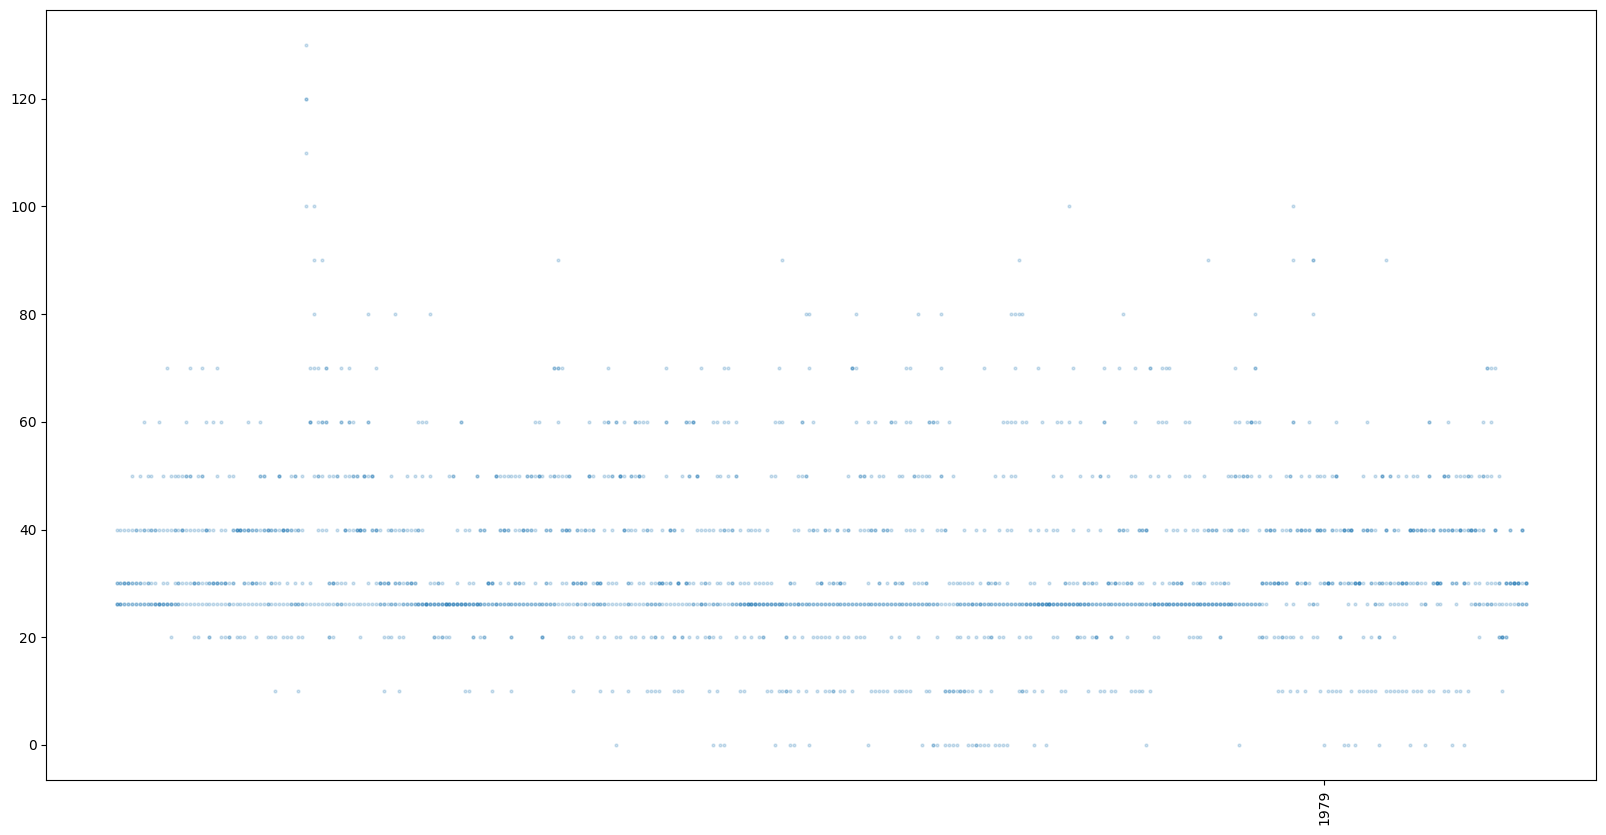

In [50]:
path_holder = 'NO2_Total_Data.csv'
df_holder = pd.read_csv(path_holder)
holder_series = df_holder['Date'].copy(deep=True)
df_holder['Date'] = pd.to_datetime(df_holder['Date'],format='%Y%m%d',errors='coerce').fillna(
    pd.to_datetime(df_holder['Date'],format='%Y/%m/%d',errors='coerce').fillna(
        pd.to_datetime(df_holder['Date'],format="%Y-%m-%d",errors='coerce').fillna(
            pd.to_datetime(df_holder['Date'],format='%m/%d/%Y',errors='coerce').fillna(
                pd.to_datetime(df_holder['Date'],format="%d-%m-%Y",errors='coerce').fillna(
                    pd.to_datetime(df_holder['Date'],format='%d%m%Y',errors='coerce')
                )
            )
        )
    )
)
# df_holder['Date'] = holder_series
# df_holder.loc[df_holder['H15'].abs() > 300, 'H15'] = df_holder['H15'].mean()
single_station_df = df_holder[(df_holder['City'] == 'Montreal') |  (df_holder['City'] == 'MontrÃ©al')  | (df_holder['City'] == 'Montréal') | (df_holder['City'] == 'Montr�al')  ]

print(single_station_df.shape[0])
print(single_station_df.shape[1])

print(df_holder[(df_holder['City']=='Montreal') & (df_holder['Date'] == pd.to_datetime("01-10-2008"))])

plt.figure(figsize=(20,10))
ax = plt.gca()

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=365))
plt.xticks(rotation=90)
# plt.gcf().autofmt_xdate()\
# ax.set_xlim( [single_station_df['Date'].min(), single_station_df['Date'].max()] )
# ax.set_ylim( [0, 300] )
plt.scatter(single_station_df['Date'],single_station_df['H15'], s=4, alpha=0.2)
plt.show()



In [2]:
with ZipFile('./Chemicals_Total_Data.zip', 'w') as zip_object:
    zip_object.write('CO_Total_Data.csv')
    zip_object.write('NO_Total_Data.csv')
    zip_object.write('NOX_Total_Data.csv')
    zip_object.write('NO2_Total_Data.csv')
    zip_object.write('SO2_Total_Data.csv')
    zip_object.write('PM25_Total_Data.csv')
    zip_object.write('PM10_Total_Data.csv')
    zip_object.write('O3_Total_Data.csv')

In [3]:
path_holder = 'CO_Total_Data.csv'
df_holder = pd.read_csv(path_holder, nrows=50)
df_holder.to_csv('CO_Total_Data_Test.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'CO2_Total_Data.csv'